Датасет содержит следующие признаки:<br><br>
age — возраст<br>
sex — пол (1 - мужчина, 0 - женщина)<br>
cp — тип боли в груди (4 значения)<br>
trestbps — артериальное давление в покое<br>
chol — холестерин сыворотки в мг/дл<br>
fbs — уровень сахара в крови натощак > 120 мг/дл<br>
restecg — результаты электрокардиографии в покое (значения 0,1,2)<br>
thalach — достигнута максимальная частота сердечных сокращений<br>
exang — стенокардия, вызванная физической нагрузкой<br>
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя<br>
slope — наклон пикового сегмента ST при нагрузке<br>
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии<br>
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект<br>

In [1]:
import pandas as pd

heart = pd.read_csv('heart.zip')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Задание 8.1<BR>
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

In [2]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

Задание 8.2<br><br>
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.<br><br>
Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.<br><br>
Возраст (лет)	Мужчины	Женщины<br>
до 20	123/76	116/72<br>
21-30	126/79	120/75<br>
31-40	129/81	127/80<br>
41-50	135/83	137/84<br>
51-60	142/85	144/85<br>
61 и старше	142/80	159/85<br>

In [25]:
def trestbps(x):
    age = x['age']
    sex = x['sex']
    if sex == 1:
        if age <=20:
            return 123
        if age <=30:
            return 126
        if age <=40:
            return 129
        if age <=50:
            return 135
        if age <=60:
            return 142
        if age >60:
            return 142
    if sex == 0:
        if age <=20:
            return 116
        if age <=30:
            return 120
        if age <=40:
            return 127
        if age <=50:
            return 137
        if age <=60:
            return 144
        if age >60:
            return 159    
    return

heart['trestbps'] = heart.apply(trestbps, axis=1)

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,142,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,129,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,137,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,142,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,144,354,0,1,163,1,0.6,2,0,2,1,0


In [27]:
heart.iloc[300]

age          68.0
sex           1.0
cp            0.0
trestbps    142.0
chol        193.0
fbs           1.0
restecg       1.0
thalach     141.0
exang         0.0
oldpeak       3.4
slope         1.0
ca            2.0
thal          3.0
target        0.0
old           1.0
Name: 300, dtype: float64

cp<br>
restecg<br>
slope<br>
ca<br>
thal<br>
<br>
Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.<br><br>

Сколько признаков получилось в датасете?

In [28]:
import category_encoders as ce

In [31]:
heart = pd.get_dummies(heart, columns=['cp','restecg','slope','ca','thal'])
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    int64  
 3   chol       303 non-null    int64  
 4   fbs        303 non-null    int64  
 5   thalach    303 non-null    int64  
 6   exang      303 non-null    int64  
 7   oldpeak    303 non-null    float64
 8   target     303 non-null    int64  
 9   old        303 non-null    int64  
 10  cp_0       303 non-null    uint8  
 11  cp_1       303 non-null    uint8  
 12  cp_2       303 non-null    uint8  
 13  cp_3       303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  slope_0    303 non-null    uint8  
 18  slope_1    303 non-null    uint8  
 19  slope_2    303 non-null    uint8  
 20  ca_0      

### Нормализуйте все числовые признаки подходящим способом.

In [32]:
# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

<AxesSubplot: title={'center': 'Распределения после RobustScaler'}, xlabel='thalach', ylabel='Density'>

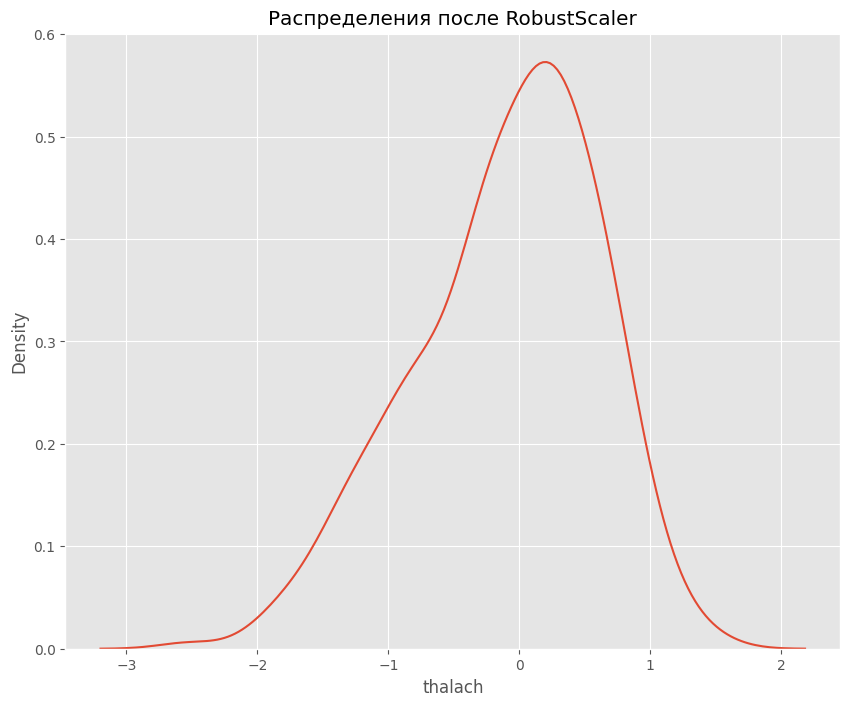

In [43]:
# инициализируем нормализатор RobustScaler
r_heart = preprocessing.RobustScaler()

# кодируем исходный датасет
heart_r = r_heart.fit_transform(heart)

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(heart.columns)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_r = pd.DataFrame(heart_r, columns=col_names)
#,'chol','oldpeak','thalach'
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(heart_r['thalach'], ax=ax1)
#sns.kdeplot(heart_r['exponential'], ax=ax1)
#sns.kdeplot(heart_r['normal_p'], ax=ax1)
#sns.kdeplot(heart_r['normal_l'], ax=ax1)

In [45]:
round(heart_r['chol'].describe(),6)

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

<AxesSubplot: >

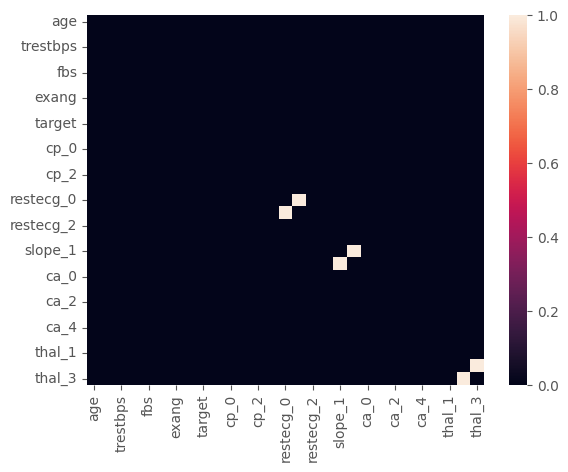

In [55]:
# Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(heart_r.corr()<=-0.7, annot=False) # включаем отображение коэффициентов

In [56]:
heart_r.corr()<=-0.7

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
trestbps,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chol,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fbs,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
thalach,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
exang,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
oldpeak,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
target,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
old,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
